<a href="https://colab.research.google.com/github/ivpcl/AOLME_Level2/blob/main/Presentation_2022/LinearPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Interactive visualization command in Jupyter Lab
!pip install ipywidgets

# Google Colab suggested approach for supporting Widgets.
# !pip install ipympl
# from google.colab import output
# output.enable_custom_widget_manager()
# %matplotlib widget

# Import libraries
import numpy as np              # import NumPy library

# Example setup from:
# https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets

# Plot the function:
import matplotlib.pyplot as plt

import math # for floor and ceiling

# Import plotly
import plotly.graph_objects as go
import plotly.express as px

# Data frames using pandas
import pandas as pd

In [ ]:
#@title { run: "auto" }
# Linear example taken from:
# https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

def f(m, b):
  # Get the figure and axes handles
  fig, ax = plt.subplots()

  # X-axis
  minX  = -10 # minimum value for X
  maxX  = +10 # maximum value for Y
  xdata = range(minX, maxX+1, 1) # Integer points to plot
  plt.xlim(minX, maxX) # Set the x-limits for the plot
  fig.set_figwidth((maxX-minX)/2.0)

  # Y-axis
  minY  = -5  # minimum value for Y
  maxY  = +5  # maximum value for Y
  ydata = range(minY, maxY+1, 1) # Integer grid to display
  plt.ylim(minY, maxY) # Set the y-limits for the plot
  fig.set_figheight((maxY-minY)/2.0)


  # Define the grid over integer values:
  ax.set_xticks(xdata)
  ax.set_yticks(ydata)
  plt.grid(True, alpha=0.5) # Make opacity softer

  # Plot the two axes and add tick points:
  plt.axvline(x=0.0, ymin=minY, ymax=maxY) # x-axis
  plt.axhline(y=0.0, xmin=minX, xmax=maxX) # y-axis

  # Plot the integer tick points for x:
  tick_min = 0.5 - 0.25*1/(maxY - minY) # fraction for min Y
  tick_max = 0.5 + 0.25*1/(maxY - minY) # fraction for max Y 
  for x_tick in range(minX, 0, 1):
    plt.axvline(x=x_tick, ymin=tick_min, ymax=tick_max)
    plt.text(x=x_tick-0.25, y=-0.75, s=str(x_tick), fontsize=12)

  for x_tick in range(1, maxX+1, 1):
    plt.axvline(x=x_tick, ymin=tick_min, ymax=tick_max)
    plt.text(x=x_tick-0.25, y=-0.75, s=str(x_tick), fontsize=12)

  plt.text(x=-0.5, y=-0.5, s="0", fontsize=12)
  plt.text(x=maxX/2.0, y=-1.5, s="x", fontsize=12)

  # Plot the integer tick points for y:
  tick_min = 0.5 - 0.25*1/(maxX - minX) # fraction for min X
  tick_max = 0.5 + 0.25*1/(maxX - minX) # fraction for max X 
  for y_tick in range(minY, 0, 1):
    plt.axhline(y=y_tick, xmin=tick_min, xmax=tick_max)
    plt.text(y=y_tick-0.25, x=-1.0, s=str(y_tick), fontsize=12)

  for y_tick in range(1, maxY+1, 1):
    plt.axhline(y=y_tick, xmin=tick_min, xmax=tick_max)
    plt.text(y=y_tick-0.25, x=-1.0, s=str(y_tick), fontsize=12)

  plt.text(y=maxY/2.0, x=-2.0, s="y", fontsize=12)

  # remove the outside tick axes:
  ax.set_xticklabels([])
  ax.set_yticklabels([])

  
  # Plot the points:
  for x in xdata:
    y = m*x + b
    plt.plot(x, y, "ro")
  yall = m*np.linspace(minX, maxX, maxX-minX+1)+b 
  plt.plot(xdata, yall, color="red") 

  # Equation legend:
  plt.legend([str("y = "+str(m)+"*x+"+str(b))], edgecolor="red")
  
  # Manually set the legend color
  leg = ax.get_legend()
  leg.legendHandles[0].set_color('red')

  # Set the figure size:
  # plt.figure(figsize=(15, 15))
  plt.title("y=m*x+b", fontsize=14)

  plt.show()

# Control the slope 
min_m   = -10 # minimum slope
max_m   = +10 # maximum slope
step_m  = 1   # slope change
first_m = 1   # initial value
m_widget = FloatSlider(min=min_m, max=max_m, step=step_m, value=first_m)

# Control b
min_b   = -10 # minimum m
max_b   = +10 # maximum m
step_b  = 1   # b change
first_b = 0   # initial value
b_widget = FloatSlider(min=min_b, max=max_b, step=step_b, value=first_b)

interactive_plot = interactive(f, m=m_widget, b=b_widget)
output = interactive_plot.children[-1]
output.layout.height = '500px' # Fix to avoid flickering
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='m', max=10.0, min=-10.0, step=1.0), FloatSlider(valu…

In [ ]:
# set minX, minY, maxX, maxY
# plot point
# plot line
# Also control the animation:
#  set range for m, step for m, and starting m.
#  set range for b, step for b, and starting b.
# Run the animation
# Still not so sure about the height control.
# Also, we need to check everything over the Chromebooks

In [ ]:
# Create the visualization code class.
class plotGraph:
    """
    The plotGraph class is used for graphing linear functions:
        y = m*x + b
    The class uses integer limits for x.
    
    Common Attributes
    -----------------
    m: the slope of the line to plot.
    b: the y-intercept of the line for x=0.

    minX: minimum integer value for X. Default=-10.
    maxX: maximum integer value for X. Default=+10.

    minY: minimum integer value for Y. Default=-5.
    maxY: maximum integer value for Y. Default=+5.

    color: "red", "green", "blue", "olive", "cyan", "brown", etc.
    See colors at the website below:
    https://matplotlib.org/3.1.0/gallery/color/named_colors.html


    Common Methods
    --------------
    plotGraph():           Builds a graph with the defaults.
    setX(minX, maxX):      Sets the integer bounds for X.
    setY(minY, maxY):      Sets the integer bounds for Y.
    autoY():               Sets the Y axis based on minX and maxX 
                                for all lines or points.

    line(m, b, color):     creates the given line. Erases old lines.
    point(x, y, color):    creates a point. Erases old points.

    AddLine(m, b, color):  Adds a line.
    AddPoint(x, y, color): Adds a point.

    plotAll(): Generate the plot for everything.               
    play():    Interactive visualization.       

    Interactive play for y=m*x+b
    ----------------------------
    playSlope():      sets up interactive play parameters for slope.
    playYintercept(): sets up interactive play parameters for y-intercept.
    """
    
    def __init__(self):
        """ Creates a graph object with default parameters.
        """

        # Default values:
        self.m = 1.0
        self.b = 0.0
    
        # Initialize lists of values:
        self.m_vals = [self.m]
        self.b_vals = [self.b]
        self.color_vals = ["red"]

        # Initialize lists of points:
        self.points_x = []
        self.points_y = []
        self.points_color = []

        # X-axis: use integer values.
        self.minX  = -10 # minimum value for X
        self.maxX  = +10 # maximum value for X

        # Y-axis: use integer values
        self.minY  = -5  # minimum value for Y
        self.maxY  = +5  # maximum value for Y

        # Default values for interactive play with slope:
        self.min_m   = -10 # minimum slope
        self.max_m   = +10 # maximum slope
        self.step_m  = 1   # slope change
        self.first_m = 1   # initial value

        # Default values for interactive play with constant:
        self.min_b    = -10 # minimum b
        self.max_b    = +10 # maximum b
        self. step_b  = 1   # b change
        self. first_b = 0   # initial value
 
    def setX(self, minX, maxX):
      """ sets minimum and maximum integer values for x.
      """
      self.minX = math.floor(minX)
      self.maxX = math.ceil(maxX)
    
    def setY(self, minY, maxY):
      """ sets minimum and maximum integer values for Y.
      """
      self.minY = math.floor(minY)
      self.maxY = math.ceil(maxY)


    def playSlope(self, min_m, max_m, step_m, first_m):
      """ sets the  interactive play parameters:
          y = m*x + b and b is controlled using:
           min_m:   minimum possible slope. Default=-10.
           max_m:   maximum possible slope. Default=+10.
           step_m:  allowable change in slope. Default=1.
           first_m: initial slope used for simulation. Default=1.
      """
      self.min_m   = min_m
      self.max_m   = max_m 
      self.step_m  = step_m 
      self.first_m = first_m 


    def playYintercept(self, min_b, max_b, step_b, first_b):
      """ sets the interactive play parameters for y-intercept:
          y = m*x + b and b is controlled using:
           min_b:   minimum possible constant. Default=-10.
           max_b:   maximum possible slope. Default=+10.
           step_b:  allowable change in slope. Default=1.
           first_b: initial slope used for simulation. Default=0.
      """
      self.min_b   = min_b
      self.max_b   = max_b 
      self.step_b  = step_b 
      self.first_b = first_b 

    def autoY(self):
      """ calculates the minimum and maximum values for Y to accomodate
              all plots.
      """
      self.minY = np.Inf
      self.maxY = np.NINF

      # Go through all of the lines:
      for i in range(len(self.m_vals)):
        Y1 = float(self.m_vals[i]*self.minX + self.b_vals[i])
        Y2 = float(self.m_vals[i]*self.maxX + self.b_vals[i])
        self.minY = min(self.minY, Y1)
        self.minY = min(self.minY, Y2)
        self.maxY = max(self.maxY, Y1)
        self.maxY = max(self.maxY, Y2)

      # Go through all of the points:
      for i in range(len(self.points_y)):
        self.minY = min(self.minY, self.points_y[i])
        self.maxY = max(self.maxY, self.points_y[i])

      # Set the final values for Y to be integers:
      self.minY = math.floor(self.minY)
      self.maxY = math.ceil(self.maxY)


    def line(self, m, b, color):
      """ Creates a new line with slope=m and y-intercept=b.
          Uses color to plot the line.
          WARNING: Older lines are erased.
      """
      self.m = m
      self.b = b
      self.color = color
      self.m_vals = [self.m]
      self.b_vals = [self.b]
      self.color_vals = [self.color]
    
    def point(self, x, y, color):
      """ Creates a new point with coordinates x and y.
          Uses color to plot the point.
          WARNING: Older points are erased.
      """
      self.points_x = [x]
      self.points_y = [y]
      self.points_color = [color]

    def AddLine(self, m, b, color):
      """ Adds a line with slope=m and y-intercept=b.
          Uses color to plot the line.
      """
      self.m = m
      self.b = b
      self.color = color
      self.m_vals.append(self.m)
      self.b_vals.append(self.b)
      self.color_vals.append(self.color)

    def AddPoint(self, x, y, color):
      """ Add a point with coordinates (x, y).
          Uses color to plot the point.
      """
      self.points_x.append(x)
      self.points_y.append(y)
      self.points_color(color)
    

    def play(self):
      """ play() provides an interactive in
      """
      # Control the slope 
      m_widget = FloatSlider(min=self.min_m,   max=self.max_m, 
                             step=self.step_m, value=self.first_m)

      # Control b
      b_widget = FloatSlider(min=self.min_b,   max=self.max_b, 
                             step=self.step_b, value=self.first_b)

      # Setup default color
      self.line_color = "red"

      interactive_plot = interactive(self.linePlot, m=m_widget, b=b_widget)
      output = interactive_plot.children[-1]
      output.layout.height = '500px' # Fix to avoid flickering
      return(interactive_plot)
    
    def setupGraph(self, fig, ax):
      """ builds the Graph for visualizing multiple lines.
      """

      # X-axis: assume integers
      minX = self.minX 
      maxX = self.maxX 
      self.xdata = range(minX, maxX+1, 1) # Integer points to plot
      plt.xlim(minX, maxX)                # Set the x-limits for the plot
      fig.set_figwidth((maxX-minX)/2.0)

      # Y-axis: assume integers
      minY = self.minY
      maxY = self.maxY
      self.ydata = range(minY, maxY+1, 1) # Integer grid to display
      plt.ylim(minY, maxY)                # Set the y-limits for the plot
      fig.set_figheight((maxY-minY)/2.0)

      # Define the grid over integer values:
      ax.set_xticks(self.xdata)
      ax.set_yticks(self.ydata)
      plt.grid(True, alpha=0.5) # Make opacity softer

      # Plot the two axes and add tick points:
      plt.axvline(x=0.0, ymin=self.minY, ymax=self.maxY) # x-axis
      plt.axhline(y=0.0, xmin=self.minX, xmax=self.maxX) # y-axis

      # Plot the integer tick points for x:
      tick_min = 0.5 - 0.25*1/(self.maxY - self.minY) # fraction for min Y
      tick_max = 0.5 + 0.25*1/(self.maxY - self.minY) # fraction for max Y

      # Plot the x ticks:
      for x_tick in range(self.minX, 0, 1):
        plt.axvline(x=x_tick, ymin=tick_min, ymax=tick_max)
        plt.text(x=x_tick-0.25, y=-0.75, s=str(x_tick), fontsize=12)

      # Plots the y ticks:
      for x_tick in range(1, self.maxX+1, 1):
        plt.axvline(x=x_tick, ymin=tick_min, ymax=tick_max)
        plt.text(x=x_tick-0.25, y=-0.75, s=str(x_tick), fontsize=12)

      # Plot the axes:
      plt.text(x=-0.5, y=-0.5, s="0", fontsize=12)
      plt.text(x=self.maxX/2.0, y=-1.5, s="x", fontsize=12)

      # Plot the integer tick points for y:
      tick_min = 0.5 - 0.25*1/(self.maxX - self.minX) # fraction for min X
      tick_max = 0.5 + 0.25*1/(self.maxX - self.minX) # fraction for max X 
      for y_tick in range(self.minY, 0, 1):
        plt.axhline(y=y_tick, xmin=tick_min, xmax=tick_max)
        plt.text(y=y_tick-0.25, x=-1.0, s=str(y_tick), fontsize=12)

      for y_tick in range(1, self.maxY+1, 1):
        plt.axhline(y=y_tick, xmin=tick_min, xmax=tick_max)
        plt.text(y=y_tick-0.25, x=-1.0, s=str(y_tick), fontsize=12)

      plt.text(y=self.maxY/2.0, x=-2.0, s="y", fontsize=12)

      # remove the outside tick axes:
      ax.set_xticklabels([])
      ax.set_yticklabels([])

    def plotAll(self):
      """ plots all defined lines and points.
      """
      # Get the figure and axes handles
      self.fig, self.ax = plt.subplots()
      self.setupGraph(self.fig, self.ax)

      # Plot the lines:
      lines_legend = []
      for i in range(len(self.m_vals)):
        # Plot all of the points that belong to the line:
        m = self.m_vals[i]
        b = self.b_vals[i]

        # Connect the integer points:
        yall = m*np.linspace(
                self.minX, self.maxX, self.maxX-self.minX+1) + b 

        # Add newLine
        # https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
        newLine, = self.ax.plot(self.xdata, yall, color=self.color_vals[i],
                                marker='o',
                                label=str("l"+str(i)+": y = "+str(m)+"*x+"+str(b))) 
        lines_legend.append(newLine)
        
      # Plot all of the legends:
      self.ax.legend(handles=lines_legend)

      # Plot the points:
      for i in range(len(self.points_x)):
        plt.plot(self.points_x[i], self.points_y[i], self.points_color[i])

      # Put a title on the graph:
      plt.title("y=m*x+b", fontsize=14)

      # Update the graph:
      plt.show()

    def linePlot(self, m, b):
      """ uses ax-plot to draw a single line given m, b, and color
      """
      # Get the figure and axes handles
      self.fig, self.ax = plt.subplots()
      self.setupGraph(self.fig, self.ax)

      # Plot lines and connect the integer points:
      yall = m*np.linspace(self.minX, self.maxX, self.maxX-self.minX+1)+b 
      plt.plot(self.xdata, yall, color=self.line_color, marker='o') 

      # Equation legend:
      plt.legend([str("y = "+str(m)+"*x+"+str(b))], edgecolor=self.line_color)

      # Set the figure size:
      plt.title("y=m*x+b", fontsize=14)

      # Update the graph:
      plt.show()

# Class documentation
print(dir(plotGraph))
help(plotGraph)
help(plotGraph.play)

# Create an instance:
l_plot = plotGraph()
ip = l_plot.play()
ip



['AddLine', 'AddPoint', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'autoY', 'line', 'linePlot', 'play', 'playSlope', 'playYintercept', 'plotAll', 'point', 'setX', 'setY', 'setupGraph']
Help on class plotGraph in module __main__:

class plotGraph(builtins.object)
 |  The plotGraph class is used for graphing linear functions:
 |      y = m*x + b
 |  The class uses integer limits for x.
 |  
 |  Common Attributes
 |  -----------------
 |  m: the slope of the line to plot.
 |  b: the y-intercept of the line for x=0.
 |  
 |  minX: minimum integer value for X. Default=-10.
 |  maxX: maximum integer value for X. Default=+10.
 |  
 |  minY: minimum integer value for Y. Default=-5.
 |  maxY: maximu

interactive(children=(FloatSlider(value=1.0, description='m', max=10.0, min=-10.0, step=1.0), FloatSlider(valu…

Example for plotting three lines


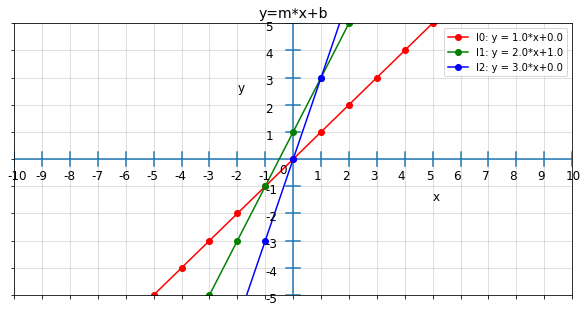

 
 
Adjusted example to fit all values for Y
 


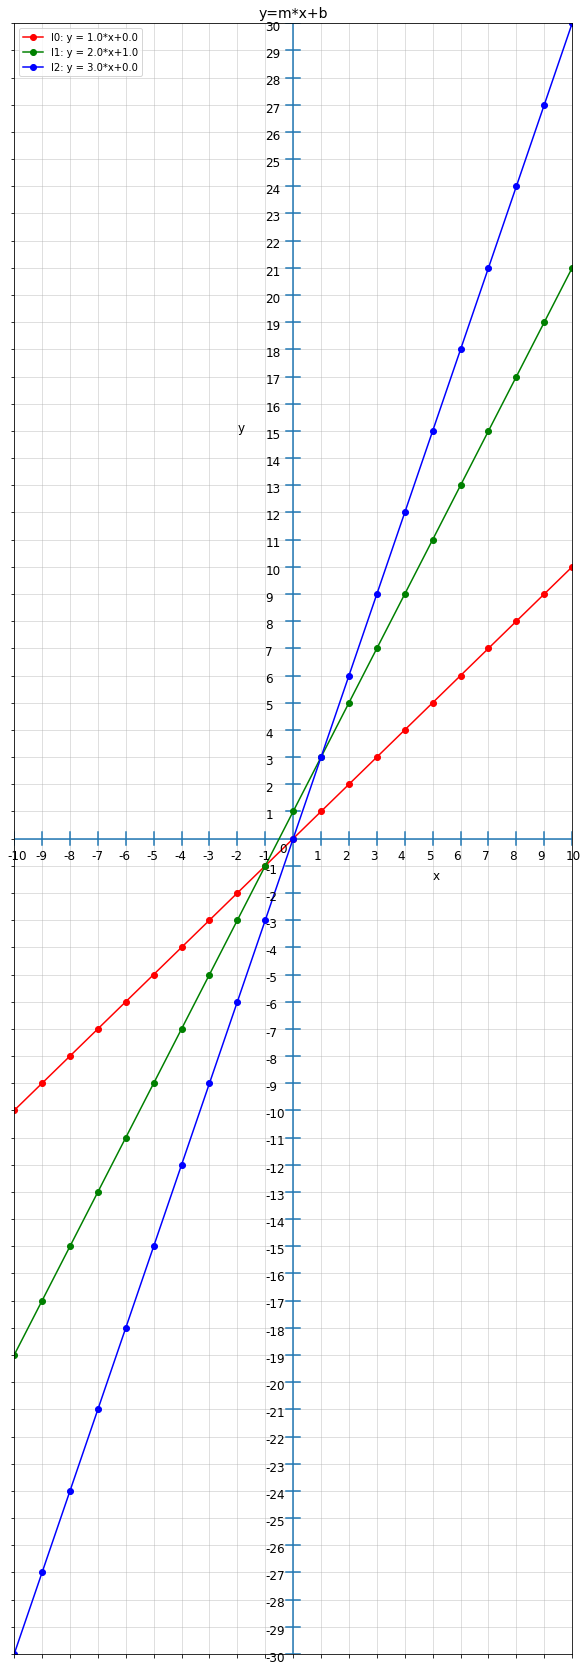

In [ ]:
# Example that creates three lines:
print("Example for plotting three lines")
l_plot = plotGraph()              # Start the graph
l_plot.line(1.0, 0.0, "red")      # first line uses line()
l_plot.AddLine(2.0, 1.0, "green") # additional line use AddLine()
l_plot.AddLine(3.0, 0.0, "blue")  # additional line
l_plot.plotAll()        

print(" ") # Empty line
print(" ")
print("Adjusted example to fit all values for Y")
print(" ")
l_plot.autoY()
l_plot.plotAll()

In [ ]:
# Create the interactive visualization code class.
class cuteGraph:
    """
    The cuteGraph class is used for graphing linear functions:
        y = m*x + b
    The class uses integer limits for x.

    Common Attributes
    -----------------
    m: the slope of the line to plot.
    b: the y-intercept of the line for x=0.

    minX: minimum integer value for X. Default=-10.
    maxX: maximum integer value for X. Default=+10.

    minY: minimum integer value for Y. Default=-5.
    maxY: maximum integer value for Y. Default=+5.

    color: "red", "green", "blue", "olive", "cyan", "brown", etc.
    See colors at the website below:
    https://matplotlib.org/3.1.0/gallery/color/named_colors.html


    Common Methods
    --------------
    plotGraph():           Builds a graph with the defaults.
    setX(minX, maxX):      Sets the integer bounds for X.
    setY(minY, maxY):      Sets the integer bounds for Y.

    line(m, b, color):     creates the given line. Erases old lines.
    point(x, y, color):    creates a point. Erases old points.

    AddLine(m, b, color):  Adds a line.
    AddPoint(x, y, color): Adds a point.

    plotAll(): Generate the plot for everything.               
    """
    
    def __init__(self):
        """ Creates a graph object with default parameters.
        """

        # Default values:
        self.m = 1.0
        self.b = 0.0
    
        # Initialize lists of values:
        self.m_vals = [self.m]
        self.b_vals = [self.b]
        self.color_vals = ["red"]

        # Initialize lists of points:
        self.points_x = []
        self.points_y = []
        self.points_color = []

        # X-axis: use integer values.
        self.minX  = -10 # minimum value for X
        self.maxX  = +10 # maximum value for X

        # Y-axis: use integer values
        self.minY  = -5  # minimum value for Y
        self.maxY  = +5  # maximum value for Y


    def setX(self, minX, maxX):
      """ sets minimum and maximum integer values for x.
      """
      self.minX = math.floor(minX)
      self.maxX = math.ceil(maxX)
    
    def setY(self, minY, maxY):
      """ sets minimum and maximum integer values for Y.
      """
      self.minY = math.floor(minY)
      self.maxY = math.ceil(maxY)

    def setGraphDims(self):
      """ sets the graph dimensions.
      """
      # Setup the dimensions of the graph:
      pixels_in_unit = 50 # The number of pixels for each unit
      self.height    = (self.maxY-self.minY+1)*pixels_in_unit
      self.width     = (self.maxX-self.minX+1)*pixels_in_unit

    def line(self, m, b, color):
      """ Creates a new line with slope=m and y-intercept=b.
          Uses color to plot the line.
          WARNING: Older lines are erased.
      """
      self.m = m
      self.b = b
      self.color = color
      self.m_vals = [self.m]
      self.b_vals = [self.b]
      self.color_vals = [self.color]
    
    def point(self, x, y, color):
      """ Creates a new point with coordinates x and y.
          Uses color to plot the point.
          WARNING: Older points are erased.
      """
      self.points_x = [x]
      self.points_y = [y]
      self.points_color = [color]

    def AddLine(self, m, b, color):
      """ Adds a line with slope=m and y-intercept=b.
          Uses color to plot the line.
      """
      self.m = m
      self.b = b
      self.color = color
      self.m_vals.append(self.m)
      self.b_vals.append(self.b)
      self.color_vals.append(self.color)

    def AddPoint(self, x, y, color):
      """ Add a point with coordinates (x, y).
          Uses color to plot the point.
      """
      self.points_x.append(x)
      self.points_y.append(y)
      self.points_color.append(color)
    
    def setupGraph(self):
      """ builds the Graph for visualizing multiple lines.
          This function was updated for plotly.
      """
      # Setup the graph in plotly
      self.fig = go.Figure()

      # X-axis: assume integers
      minX = self.minX 
      maxX = self.maxX 
      self.xdata = range(minX, maxX+1, 1) # Integer points to plot

      # Y-axis: assume integers
      minY = self.minY
      maxY = self.maxY
      self.ydata = range(minY, maxY+1, 1) # Integer grid to display
     
      # Plotly express figure ranges with grid:
      self.fig.update_xaxes(range=[minX, maxX],
                            showgrid=True, gridwidth=1, gridcolor="red")
      self.fig.update_yaxes(range=[minY, maxY],
                            showgrid=True, gridwidth=1, gridcolor="red")

      # Use plotly express layout for updates:
      pixels_in_unit = 50 # The number of pixels for each unit
      self.fig.update_layout(xaxis = dict(
                              tickmode = 'linear',
                              tick0 = minX,
                              dtick = 1.0
                                ),
                             yaxis = dict(
                                tickmode = 'linear',
                                tick0 = minY,
                                dtick = 1.0  
                                ) 
                             )
      
      # Plot the two axes and add tick points:
      self.fig.add_hline(y=0.0) # x-axis 
      self.fig.add_vline(x=0.0) # y-axis

      # Use a scatter plot to place the x-axis with markers:
      self.fig.add_trace(go.Scatter(
          x=[i for i in range(self.minX, self.maxX+1)],
          y=[0 for i in range(self.minX, self.maxX+1)],
          mode="markers+text",
          text=[str(i) for i in range(self.minX, self.maxX+1)],
          textposition="bottom right",
          showlegend=False,
          name="x-axis"))
      
      # Use a scatter plot to place the y-axis with markers:
      self.fig.add_trace(go.Scatter(
          x=[0 for i in range(self.minY, self.maxY+1)],
          y=[i for i in range(self.minY, self.maxY+1)],
          mode="markers+text",
          text=[str(i) for i in range(self.minY, self.maxY+1)],
          textposition="top left",
          showlegend=False,
          name="y-axis"))
 
 
    def plotAll(self):
      """ plots all defined lines and points.
      """
      # Setup everything for plotly:
      self.setupGraph()

      # Plot the lines:
      for i in range(len(self.m_vals)):
        # Plot all of the points that belong to the line:
        m = self.m_vals[i]
        b = self.b_vals[i]
        line_color = self.color_vals[i] 
        self.plotLine(m, b, line_color)

      # Setup the title for all of them:
      self.fig.update_layout(
          title="y=m*x+b",
          xaxis_title="X",
          yaxis_title="Y",
          legend_title="List of lines and points",
          font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
          ))
      
      # Plot all of the points:
      for i in range(len(self.points_x)):
        x_point = self.points_x[i]
        y_point = self.points_y[i]
        self.fig.add_trace(go.Scatter(
          x=[x_point], y=[y_point], 
          marker=dict(size=18,
                      line=dict(width=2, 
                                color=self.points_color[i])),
          marker_symbol="x", 
          name="Point ("+str(x_point)+" ,"+str(y_point)+")",
          mode="markers"))
      
      # Update everything
      self.setGraphDims()
      self.fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1),
                             width=self.width)

      # Update the graph:
      self.fig.show()
        
    def linePlot(self, m, b):
      """ plots a single line using plotly
      """
      # Get the figure and axes handles
      self.setupGraph()
      self.plotLine(self.m, self.b, self.line_color)
      
      # Setup the title for all of them:
      self.fig.update_layout(
          title="y=m*x+b",
          xaxis_title="X",
          yaxis_title="Y",
          legend_title="Line equation",
          font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
          ))

      # Update everything
      self.setGraphDims()
      self.fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1),
                             width=self.width)

      # Update the graph:
      self.fig.show()

    def plotLine(self, m, b, line_color):
      """ plots a single line given m, b, and line_color
      """

      # Do not support zoom-in:
      xall = np.linspace(self.minX, self.maxX, self.maxX-self.minX+1)
      yall = m*xall + b 

      # Use a simple name for the plot:
      if b>0:
        name_str = str("y = "+str(m)+"*x+"+str(b)) 
      elif b==0:
        name_str = str("y = "+str(m)+"*x")
      else:
        name_str = str("y = "+str(m)+"*x"+str(b))

      # Add the line plot:
      self.fig.add_trace(go.Scatter(
          x=xall,
          y=yall,
          mode="lines+markers",
          name=name_str,
          line=dict(color=line_color)))
      


# Class documentation
print(dir(cuteGraph))
help(cuteGraph)


['AddLine', 'AddPoint', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'line', 'linePlot', 'plotAll', 'plotLine', 'point', 'setGraphDims', 'setX', 'setY', 'setupGraph']
Help on class cuteGraph in module __main__:

class cuteGraph(builtins.object)
 |  The cuteGraph class is used for graphing linear functions:
 |      y = m*x + b
 |  The class uses integer limits for x.
 |  
 |  Common Attributes
 |  -----------------
 |  m: the slope of the line to plot.
 |  b: the y-intercept of the line for x=0.
 |  
 |  minX: minimum integer value for X. Default=-10.
 |  maxX: maximum integer value for X. Default=+10.
 |  
 |  minY: minimum integer value for Y. Default=-5.
 |  maxY: maximum integer value for 

In [ ]:
# Example that creates three lines:
print("Example for plotting three lines")
l_plot = cuteGraph()              # Start the graph

# Lines:
l_plot.line(1.0, 0.0, "red")      # first line uses line()
l_plot.AddLine(0.5, 1.0, "green") # additional line use AddLine()
l_plot.AddLine(0.6, 0.0, "blue")  # additional line

# Points:
l_plot.point(2, 3, "red")
l_plot.AddPoint(4, 5, "green")

# Plot them:
l_plot.plotAll()        


Example for plotting three lines
